In [9]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

In [10]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-08-09 18:46:08,198 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-09 18:46:08,201 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-08-09 18:46:08,201 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-09 18:46:08,202 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-08-09 18:46:08,202 Parameters: cosmological_simulation   = 0.0


In [11]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [12]:
def v_space(lrest,dl=0.001,dl_COS=0.00997,lrange=4):
    c = 3.0E5 #km/s
    dv = (dl/lrest)*c
    dv_COS = (dl_COS/lrest)*c
    vmax = ((lrange/lrest)*c)/2
    vmin = -vmax
    print('dv = ', dv)
    print('dv (COS) = ', dv_COS)
    print('v-range = [', vmin, ',', vmax,']')

In [13]:
def spec(ray_,ins, num, dlam, dlam2,col='deeppink', noise=10, lmin='auto', lmax='auto',
         line=None, el=None, rom_num=None, lrest=None, gamma=None, f_value=None, 
         DIY=False, center=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min=lmin, lambda_max=lmax, dlambda=dlam, 
                                   bin_space='velocity')
    sg2 = trident.SpectrumGenerator(lambda_min= lmin, lambda_max=lmax, dlambda=dlam2,
                                   bin_space='velocity')

    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg2.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg2.make_spectrum(ray, lines=[DIY_line])
        sg2.add_gaussian_noise(noise)
        sg2.save_spectrum('spec2.txt')



    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg2.make_spectrum(ray, lines=[line])
        sg2.add_gaussian_noise(noise)
        sg2.save_spectrum('spec2.txt')



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec2.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]

    tog = np.array([lam, flux, lam2, flux2])
    arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))

    fig = plt.figure(figsize=(15, 5))
    if center==False:
        plt.text(0.836,0.15, 'S/N = '+str(noise), transform=fig.transFigure, fontsize=12)
        
    else:
        plt.text(0.49,0.15, 'S/N = '+str(noise), transform=fig.transFigure, fontsize=12)

    plt.step(tog[2], tog[3], color='dimgrey', label=ins, linewidth=1.75, where='mid', alpha=0.8)
    plt.plot(tog[0], tog[1], color=col, label= 'dv= ' +str(dlam), alpha=0.8, linewidth=2.2)
        
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
    
    plt.xlabel('Velocity Offset [km/s]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    if lmin=='auto' and lmax=='auto':
        print(np.min(tog[0]))
        print(np.max(tog[0]))
    else:
        plt.xlim(lmin, lmax)
        

In [14]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)

yt : [INFO     ] 2022-08-09 18:46:08,990 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-08-09 18:46:08,991 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-08-09 18:46:09,745 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-08-09 18:46:09,823 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-09 18:46:09,823 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-09 18:46:09,823 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-09 18:46:09,824 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-09 18:46:09,824 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-09 18:46:09,833 Getting segment at z = 0.0: [0.5264 0.     0.259 ] unitary to [0.5264 0.5    0.259 ] unitary.
yt : [INFO 

# Ly a

In [11]:
v_space(1215.67, lrange=16)

dv =  0.24677749718262357
dv (COS) =  2.460371646910757
v-range = [ -1974.2199774609885 , 1974.2199774609885 ]


yt : [INFO     ] 2022-08-02 00:34:56,842 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:34:56,856 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:34:56,874 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-02 00:34:56,880 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-02 00:34:56,982 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:34:56,994 Creating spectrum
yt : [INFO     ] 2022-08-02 00:34:56,994 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360 A]: : 100%|██████████| 79/79 [00:00<00:00, 7097.87it/s]
yt : [INFO     ] 2022-08-02 00:34:58,723 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:34:58,823 Creating spectrum
yt : [INFO     ] 2022-08-02 00:34:58,824 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360

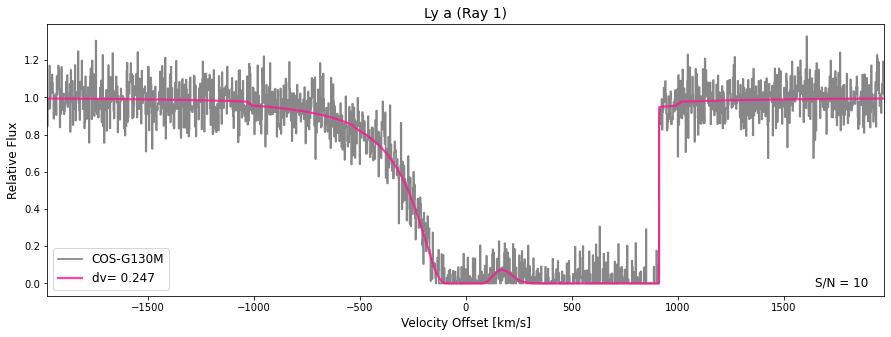

In [12]:
spec(ray_=ray1, line='Ly a',ins='COS-G130M', num='1', lmin=-1974.22, 
     lmax=1974.22, dlam=0.247, dlam2=2.46)

yt : [INFO     ] 2022-08-02 00:36:23,636 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:36:23,651 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:36:23,669 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-02 00:36:23,675 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-02 00:36:23,822 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:36:23,826 Creating spectrum
yt : [INFO     ] 2022-08-02 00:36:23,827 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360 A]: : 100%|██████████| 17/17 [00:00<00:00, 5754.90it/s]
yt : [INFO     ] 2022-08-02 00:36:24,284 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:36:24,389 Creating spectrum
yt : [INFO     ] 2022-08-02 00:36:24,389 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360

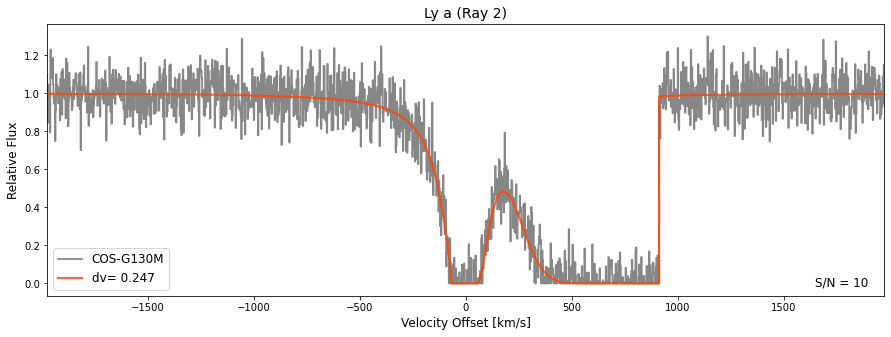

In [13]:
spec(ray_=ray2, lmin=-1974.22, lmax=1974.22, 
     line='Ly a',ins='COS-G130M', num='2', col='orangered', dlam=0.247,dlam2=2.46)

yt : [INFO     ] 2022-08-02 00:37:19,061 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:37:19,077 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:37:19,096 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-02 00:37:19,102 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-02 00:37:19,197 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:37:19,200 Creating spectrum
yt : [INFO     ] 2022-08-02 00:37:19,201 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360 A]: : 100%|██████████| 44/44 [00:00<00:00, 7173.09it/s]
yt : [INFO     ] 2022-08-02 00:37:20,112 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:37:20,215 Creating spectrum
yt : [INFO     ] 2022-08-02 00:37:20,215 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360

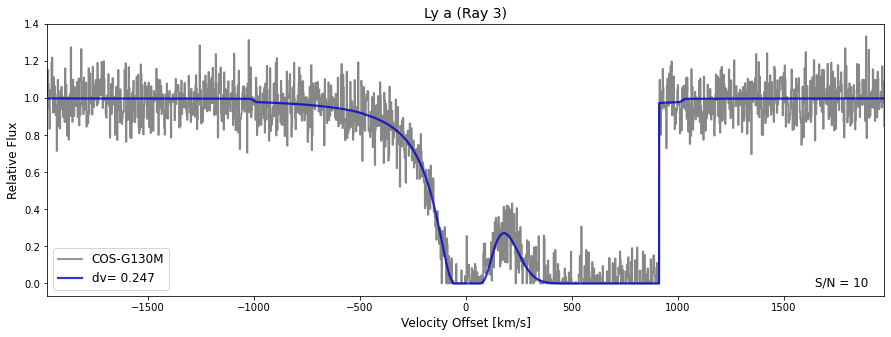

In [14]:
spec(ray_=ray3, lmin=-1974.22, lmax=1974.22, 
     line='Ly a',ins='COS-G130M', num='3', col='mediumblue', dlam=0.247, dlam2=2.46)

# Si II 1526

In [15]:
v_space(1526.707,dl_COS=0.01223)

dv =  0.19650135880689615
dv (COS) =  2.40321161820834
v-range = [ -393.00271761379224 , 393.00271761379224 ]


yt : [INFO     ] 2022-08-02 00:39:03,740 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:39:03,755 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:39:03,760 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:39:03,801 Creating spectrum
yt : [INFO     ] 2022-08-02 00:39:03,802 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3155.61it/s]
yt : [INFO     ] 2022-08-02 00:39:03,913 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:39:03,941 Creating spectrum
yt : [INFO     ] 2022-08-02 00:39:03,941 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7813.75it/s]
yt : [INFO     ] 2022-08-02 00:39:04,007 Writing spectrum to ascii file: spec2.txt.
<ipy

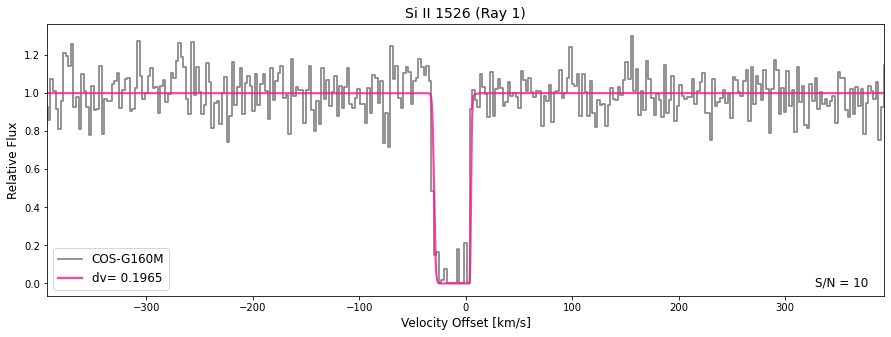

In [17]:
spec(ray1, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M',dlam2=2.4, num='1', lmin=-393, lmax=393, dlam=0.1965)

yt : [INFO     ] 2022-08-02 00:39:58,578 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:39:58,590 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:39:58,598 Creating spectrum
yt : [INFO     ] 2022-08-02 00:39:58,599 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10980.08it/s]
yt : [INFO     ] 2022-08-02 00:39:58,665 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:39:58,692 Creating spectrum
yt : [INFO     ] 2022-08-02 00:39:58,693 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19936.16it/s]
yt : [INFO     ] 2022-08-02 00:39:58,744 Writing spectrum to ascii file: spec2.txt.
<ipython-input-9-2dc88b14d218>:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which i

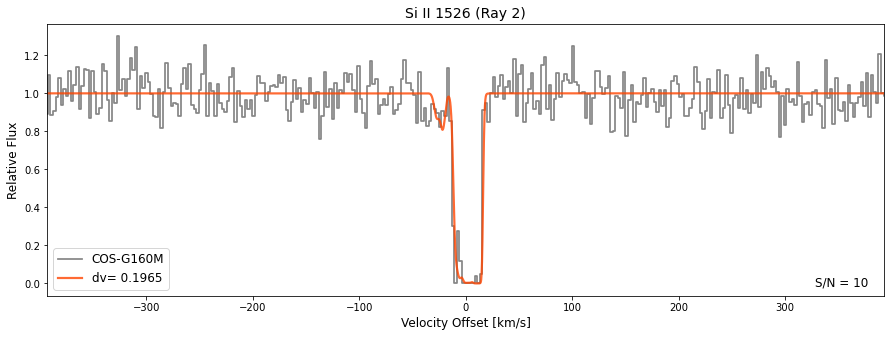

In [19]:
spec(ray2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M',dlam2=2.4, num='2', 
     lmin=-393, lmax=393, dlam=0.1965, col='orangered')

yt : [INFO     ] 2022-08-02 00:40:40,148 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:40:40,160 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:40:40,167 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:40:40,172 Creating spectrum
yt : [INFO     ] 2022-08-02 00:40:40,174 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5448.75it/s]
yt : [INFO     ] 2022-08-02 00:40:40,266 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:40:40,292 Creating spectrum
yt : [INFO     ] 2022-08-02 00:40:40,293 Setting wavelength of velocity center to Si II 1526 line at z = 0.000: 1526.707 angstrom.
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11671.36it/s]
yt : [INFO     ] 2022-08-02 00:40:40,345 Writing spectrum to ascii file: spec2.txt.
<ip

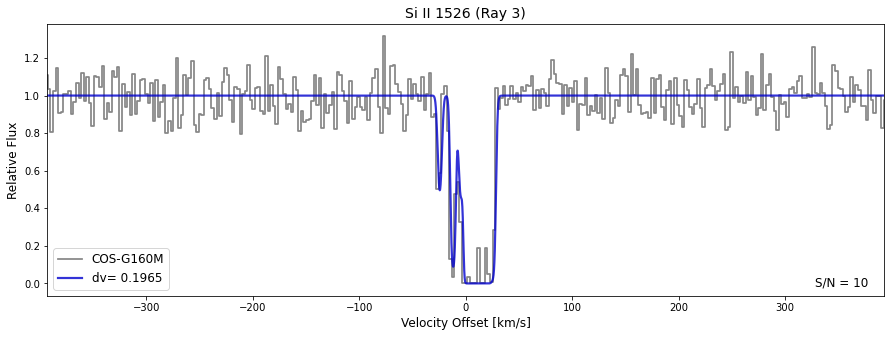

In [20]:
spec(ray3, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M',dlam2=2.4, num='3', 
     lmin=-393, lmax=393, dlam=0.1965, col='mediumblue')

# Si III 1206

In [21]:
v_space(1206.5)

dv =  0.24865312888520513
dv (COS) =  2.479071694985495
v-range = [ -497.30625777041024 , 497.30625777041024 ]


yt : [INFO     ] 2022-08-02 00:42:18,896 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:42:18,910 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:42:18,919 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:42:18,949 Creating spectrum
yt : [INFO     ] 2022-08-02 00:42:18,950 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3207.73it/s]
yt : [INFO     ] 2022-08-02 00:42:19,146 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:42:19,173 Creating spectrum
yt : [INFO     ] 2022-08-02 00:42:19,173 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
yt : [INFO     ] 2022-08-02 00:42:19,205 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:0

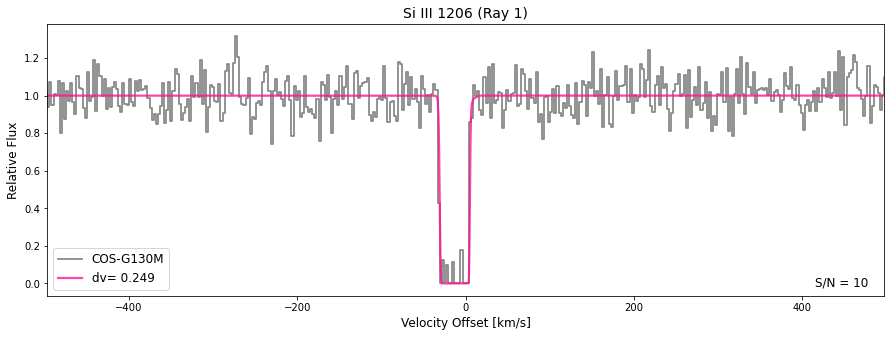

In [22]:
spec(ray1, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1', 
     lmin=-497.3,lmax=497.3, dlam=0.249, dlam2=2.48)

yt : [INFO     ] 2022-08-02 00:42:52,120 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:42:52,133 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:42:52,140 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:42:52,145 Creating spectrum
yt : [INFO     ] 2022-08-02 00:42:52,146 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9697.29it/s]
yt : [INFO     ] 2022-08-02 00:42:52,242 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:42:52,272 Creating spectrum
yt : [INFO     ] 2022-08-02 00:42:52,273 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
yt : [INFO     ] 2022-08-02 00:42:52,303 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:0

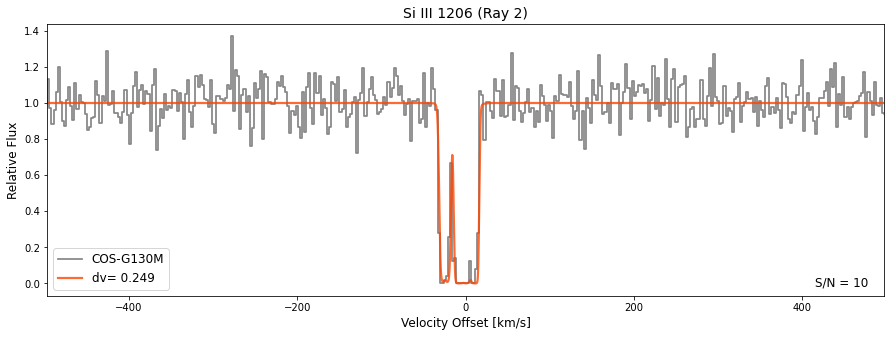

In [23]:
spec(ray2, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='2', 
     lmin=-497.3,lmax=497.3, dlam=0.249, dlam2=2.48, col='orangered')

yt : [INFO     ] 2022-08-02 00:43:12,428 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:43:12,439 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:43:12,448 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:43:12,454 Creating spectrum
yt : [INFO     ] 2022-08-02 00:43:12,455 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5464.22it/s]
yt : [INFO     ] 2022-08-02 00:43:12,593 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:43:12,619 Creating spectrum
yt : [INFO     ] 2022-08-02 00:43:12,620 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
yt : [INFO     ] 2022-08-02 00:43:12,652 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:0

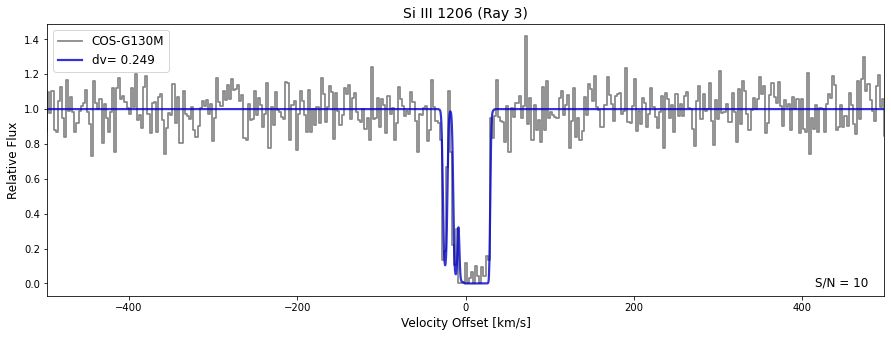

In [24]:
spec(ray3, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', 
     lmin=-497.3,lmax=497.3, dlam=0.249, dlam2=2.48, col='mediumblue')

# Si IV 1393

In [25]:
v_space(1393.7550)

dv =  0.21524586458882658
dv (COS) =  2.1460012699506006
v-range = [ -430.49172917765316 , 430.49172917765316 ]


yt : [INFO     ] 2022-08-02 00:46:10,141 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:10,154 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:10,163 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:46:10,195 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:10,195 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4171.26it/s]
yt : [INFO     ] 2022-08-02 00:46:10,291 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:46:10,319 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:10,320 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8772.47it/s]
yt : [INFO     ] 2022-08-02 00:46:10,383 Writing spectrum to ascii file: spec2.txt.
<ipy

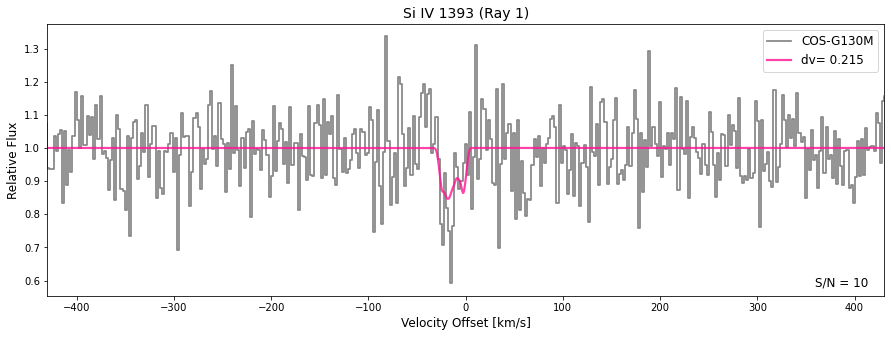

In [26]:
spec(ray1, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='1', lmin=-430.49, lmax=430.49,
    dlam=0.215, dlam2=2.146)

yt : [INFO     ] 2022-08-02 00:46:32,649 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:32,661 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:32,669 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:46:32,675 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:32,676 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11441.77it/s]
yt : [INFO     ] 2022-08-02 00:46:32,741 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:46:32,767 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:32,768 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17949.85it/s]
yt : [INFO     ] 2022-08-02 00:46:32,818 Writing spectrum to ascii file: spec2.txt.
<i

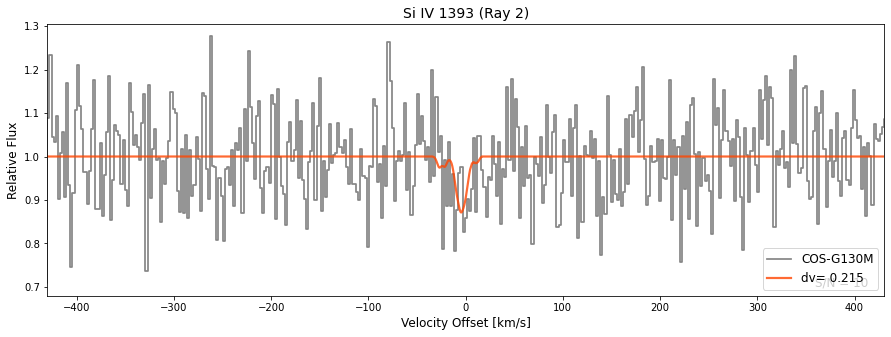

In [27]:
spec(ray2, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='2', lmin=-430.49, lmax=430.49,
    dlam=0.215, dlam2=2.146, col='orangered')

yt : [INFO     ] 2022-08-02 00:46:53,552 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:53,565 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:46:53,573 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:46:53,578 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:53,578 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6226.11it/s]
yt : [INFO     ] 2022-08-02 00:46:53,662 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:46:53,688 Creating spectrum
yt : [INFO     ] 2022-08-02 00:46:53,688 Setting wavelength of velocity center to Si IV 1393 line at z = 0.000: 1393.755 angstrom.
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12412.77it/s]
yt : [INFO     ] 2022-08-02 00:46:53,741 Writing spectrum to ascii file: spec2.txt.
<ip

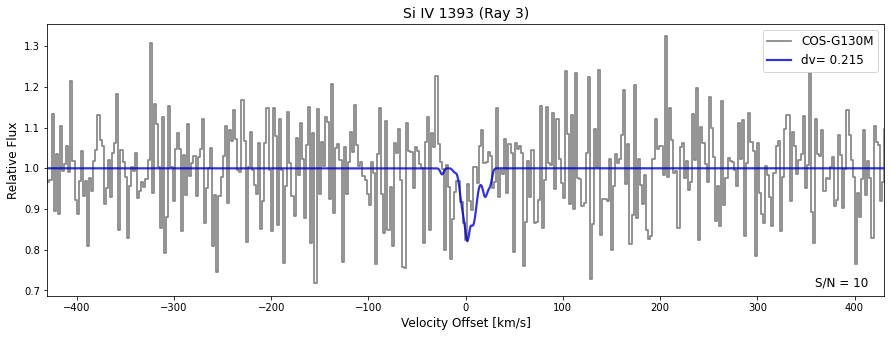

In [28]:
spec(ray3, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='3', lmin=-430.49, lmax=430.49,
    dlam=0.215, dlam2=2.146, col='mediumblue')

# C II 1334

In [29]:
v_space(1334.5320)

dv =  0.22479790668189298
dv (COS) =  2.241235129618473
v-range = [ -449.59581336378596 , 449.59581336378596 ]


yt : [INFO     ] 2022-08-02 00:48:44,089 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:48:44,103 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:48:44,110 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:48:44,135 Creating spectrum
yt : [INFO     ] 2022-08-02 00:48:44,136 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3016.05it/s]
yt : [INFO     ] 2022-08-02 00:48:44,257 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:48:44,284 Creating spectrum
yt : [INFO     ] 2022-08-02 00:48:44,285 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6235.98it/s]
yt : [INFO     ] 2022-08-02 00:48:44,357 Writing spectrum to ascii file: spec2.txt.
<ipython-

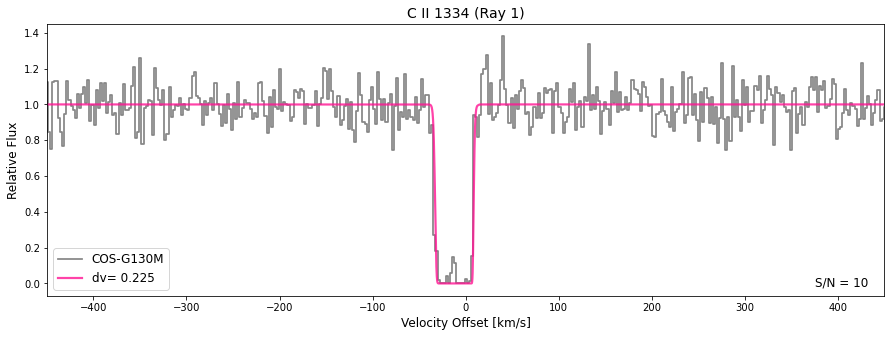

In [30]:
spec(ray1, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='1', 
     lmin=-449.6, lmax=449.6, dlam=0.225, dlam2=2.24)

yt : [INFO     ] 2022-08-02 00:49:10,350 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:49:10,362 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:49:10,368 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:49:10,373 Creating spectrum
yt : [INFO     ] 2022-08-02 00:49:10,373 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10234.69it/s]
yt : [INFO     ] 2022-08-02 00:49:10,439 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:49:10,467 Creating spectrum
yt : [INFO     ] 2022-08-02 00:49:10,467 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15342.24it/s]
yt : [INFO     ] 2022-08-02 00:49:10,518 Writing spectrum to ascii file: spec2.txt.
<ipytho

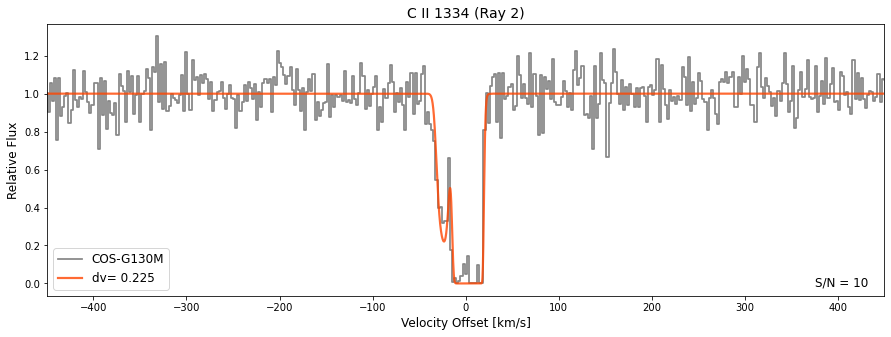

In [31]:
spec(ray2, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='2', 
     lmin=-449.6, lmax=449.6, dlam=0.225, dlam2=2.24, col='orangered')

yt : [INFO     ] 2022-08-02 00:50:02,411 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:50:02,423 Setting instrument to Custom
yt : [INFO     ] 2022-08-02 00:50:02,430 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-02 00:50:02,435 Creating spectrum
yt : [INFO     ] 2022-08-02 00:50:02,436 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4903.83it/s]
yt : [INFO     ] 2022-08-02 00:50:02,527 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-02 00:50:02,553 Creating spectrum
yt : [INFO     ] 2022-08-02 00:50:02,554 Setting wavelength of velocity center to C II 1334 line at z = 0.000: 1334.532 angstrom.
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9622.98it/s]
yt : [INFO     ] 2022-08-02 00:50:02,614 Writing spectrum to ascii file: spec2.txt.
<ipython-

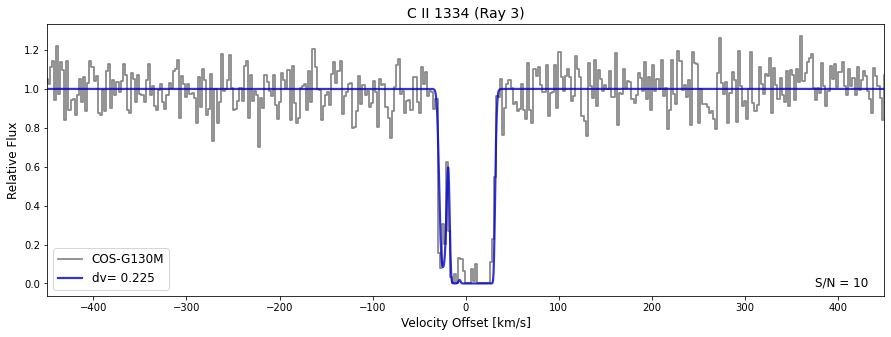

In [32]:
spec(ray3, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='3', 
     lmin=-449.6, lmax=449.6, dlam=0.225, dlam2=2.24, col='mediumblue')
plt.legend(loc='lower left', fontsize=12)

# C III 977

In [7]:
v_space(977.0201)

dv =  0.30705611890686796
dv (COS) =  3.0613495055014734
v-range = [ -614.1122378137359 , 614.1122378137359 ]


yt : [INFO     ] 2022-08-09 18:47:41,366 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:47:41,383 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:47:41,403 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-09 18:47:41,410 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-09 18:47:41,509 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:47:41,533 Creating spectrum
yt : [INFO     ] 2022-08-09 18:47:41,533 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3119.79it/s]
yt : [INFO     ] 2022-08-09 18:47:41,739 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:47:41,767 Creating spectrum
yt : [INFO     ] 2022-08-09 18:47:41,767 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 97

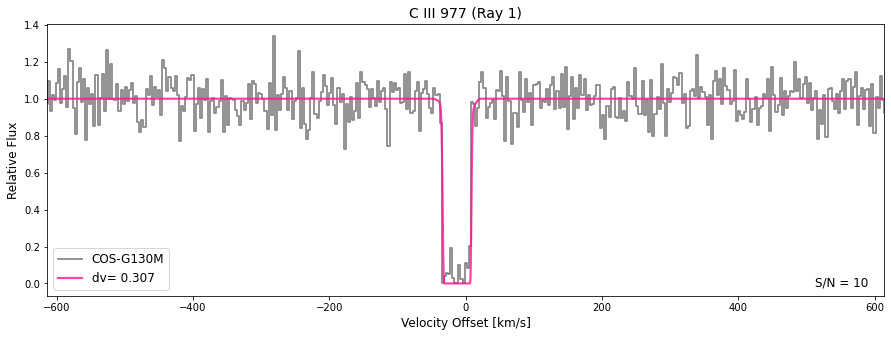

In [16]:
spec(ray1, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='1', lmin=-614, lmax=614,
    dlam=0.307,dlam2=3.06)

yt : [INFO     ] 2022-08-09 18:48:12,093 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:48:12,106 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:48:12,126 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-09 18:48:12,132 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-09 18:48:12,276 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:48:12,281 Creating spectrum
yt : [INFO     ] 2022-08-09 18:48:12,281 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9686.61it/s]
yt : [INFO     ] 2022-08-09 18:48:12,366 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:48:12,393 Creating spectrum
yt : [INFO     ] 2022-08-09 18:48:12,393 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 97

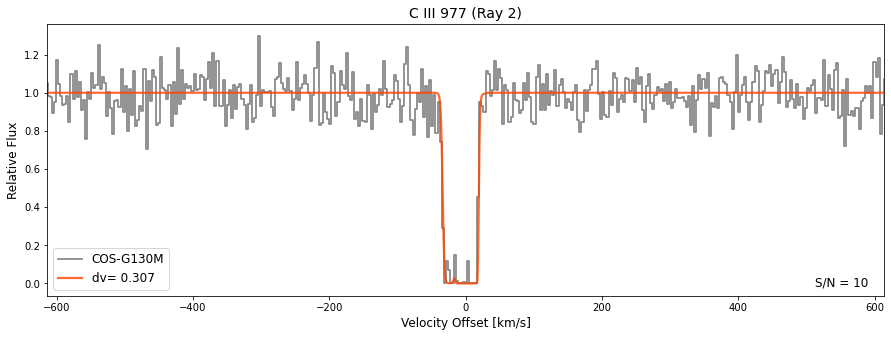

In [17]:
spec(ray2, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='2', col='orangered',
    lmin=-614, lmax=614,
    dlam=0.307,dlam2=3.06)

yt : [INFO     ] 2022-08-09 18:48:26,934 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:48:26,949 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:48:26,967 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-09 18:48:26,974 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-09 18:48:27,069 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:48:27,072 Creating spectrum
yt : [INFO     ] 2022-08-09 18:48:27,073 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4978.52it/s]
yt : [INFO     ] 2022-08-09 18:48:27,210 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:48:27,237 Creating spectrum
yt : [INFO     ] 2022-08-09 18:48:27,237 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 97

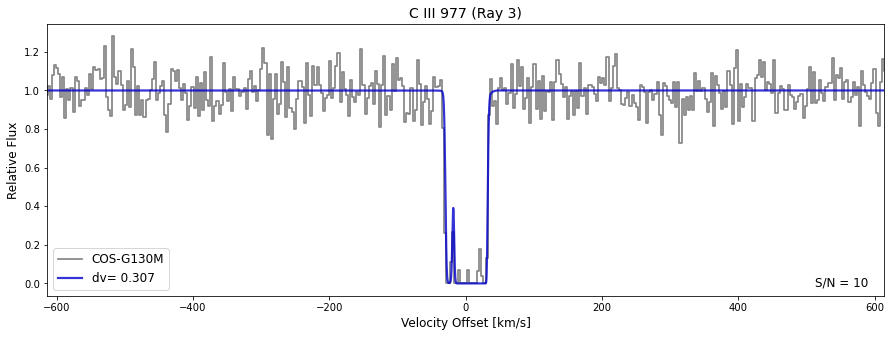

In [18]:
spec(ray3, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='3', col='mediumblue',
    lmin=-614, lmax=614,
    dlam=0.307,dlam2=3.06)

# C IV 1548

In [8]:
v_space(1548.187, dl_COS=0.01223)

dv =  0.1937750413871193
dv (COS) =  2.3698687561644687
v-range = [ -387.55008277423855 , 387.55008277423855 ]


yt : [INFO     ] 2022-08-09 18:49:49,161 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:49:49,174 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:49:49,182 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:49:49,208 Creating spectrum
yt : [INFO     ] 2022-08-09 18:49:49,208 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6475.78it/s]
yt : [INFO     ] 2022-08-09 18:49:49,282 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:49:49,311 Creating spectrum
yt : [INFO     ] 2022-08-09 18:49:49,312 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7651.39it/s]
yt : [INFO     ] 2022-08-09 18:49:49,376 Writing spectrum to ascii file: spec2.txt.
<ipython-

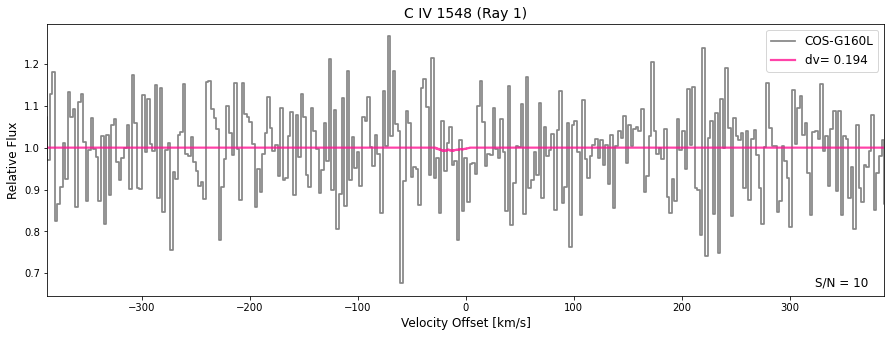

In [20]:
spec(ray1, line='C IV 1548', ins='COS-G160L', num='1', 
     lmin=-387.55, lmax=387.55, dlam=0.194, dlam2=2.37)

yt : [INFO     ] 2022-08-09 18:50:12,605 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:50:12,619 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:50:12,627 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:50:12,632 Creating spectrum
yt : [INFO     ] 2022-08-09 18:50:12,633 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5961.66it/s]
yt : [INFO     ] 2022-08-09 18:50:12,719 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:50:12,746 Creating spectrum
yt : [INFO     ] 2022-08-09 18:50:12,747 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7454.26it/s]
yt : [INFO     ] 2022-08-09 18:50:12,814 Writing spectrum to ascii file: spec2.txt.
<ipython-

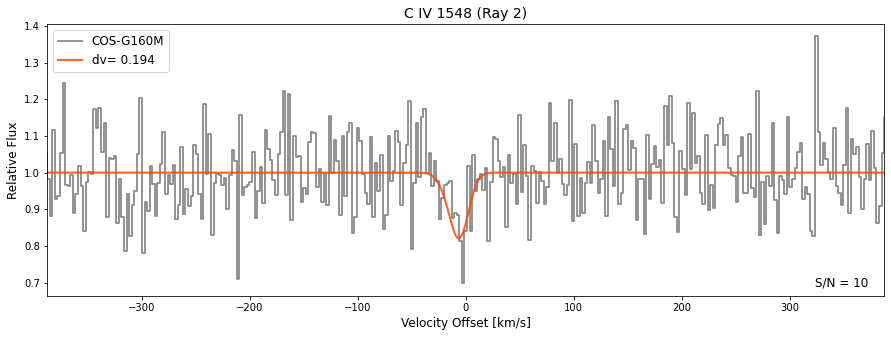

In [22]:
spec(ray2,line='C IV 1548', ins='COS-G160M', num='2', col='orangered', 
    lmin=-387.55, lmax=387.55, dlam=0.194, dlam2=2.37)

yt : [INFO     ] 2022-08-09 18:50:40,425 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:50:40,439 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:50:40,446 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:50:40,453 Creating spectrum
yt : [INFO     ] 2022-08-09 18:50:40,453 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6372.58it/s]
yt : [INFO     ] 2022-08-09 18:50:40,535 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:50:40,562 Creating spectrum
yt : [INFO     ] 2022-08-09 18:50:40,562 Setting wavelength of velocity center to C IV 1548 line at z = 0.000: 1548.187 angstrom.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7480.75it/s]
yt : [INFO     ] 2022-08-09 18:50:40,628 Writing spectrum to ascii file: spec2.txt.
<ipython-

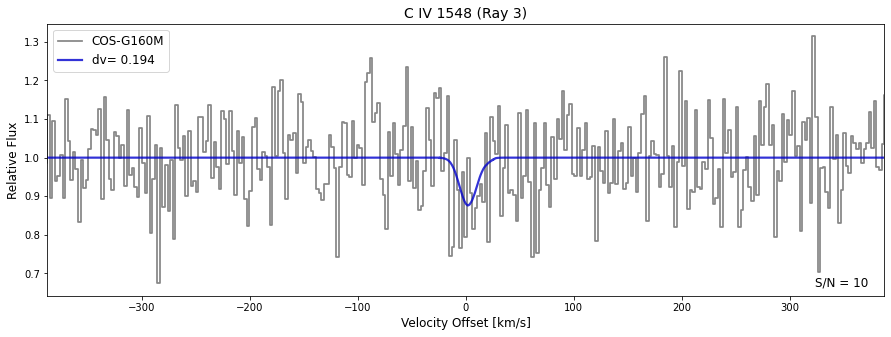

In [23]:
spec(ray3,line='C IV 1548', ins='COS-G160M', num='3', col='mediumblue',
    lmin=-387.55, lmax=387.55, dlam=0.194, dlam2=2.37)

# O I 1302

In [24]:
v_space(1302.168)

dv =  0.23038501944449566
dv (COS) =  2.2969386438616217
v-range = [ -460.7700388889913 , 460.7700388889913 ]


yt : [INFO     ] 2022-08-09 18:57:06,873 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:06,886 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:06,893 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:57:06,923 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:06,923 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3107.31it/s]
yt : [INFO     ] 2022-08-09 18:57:07,041 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:57:07,068 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:07,069 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6670.99it/s]
yt : [INFO     ] 2022-08-09 18:57:07,141 Writing spectrum to ascii file: spec2.txt.
<ipython-input-1

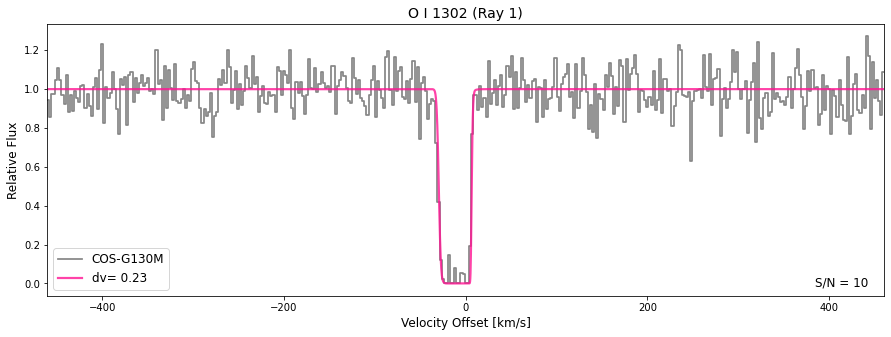

In [25]:
spec(ray1, line='O I 1302', ins='COS-G130M', num='1',
    lmin=-460.77,lmax=460.77, dlam=0.23, dlam2=2.3)

yt : [INFO     ] 2022-08-09 18:57:25,791 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:25,805 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:25,812 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:57:25,817 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:25,818 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11255.75it/s]
yt : [INFO     ] 2022-08-09 18:57:25,885 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:57:25,911 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:25,912 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17355.93it/s]
yt : [INFO     ] 2022-08-09 18:57:25,961 Writing spectrum to ascii file: spec2.txt.
<ipython-input

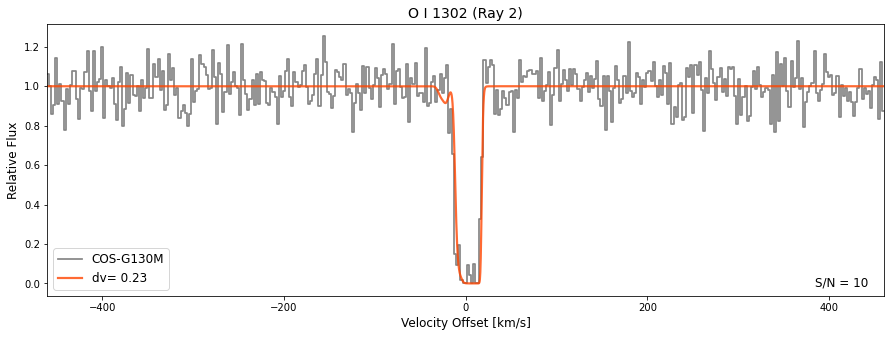

In [26]:
spec(ray2, line='O I 1302', ins='COS-G130M', num='2', col='orangered', 
     lmin=-460.77,lmax=460.77, dlam=0.23, dlam2=2.3)

yt : [INFO     ] 2022-08-09 18:57:46,984 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:46,997 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 18:57:47,004 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 18:57:47,009 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:47,010 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5420.39it/s]
yt : [INFO     ] 2022-08-09 18:57:47,102 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 18:57:47,130 Creating spectrum
yt : [INFO     ] 2022-08-09 18:57:47,131 Setting wavelength of velocity center to O I 1302 line at z = 0.000: 1302.168 angstrom.
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10256.00it/s]
yt : [INFO     ] 2022-08-09 18:57:47,192 Writing spectrum to ascii file: spec2.txt.
<ipython-input-

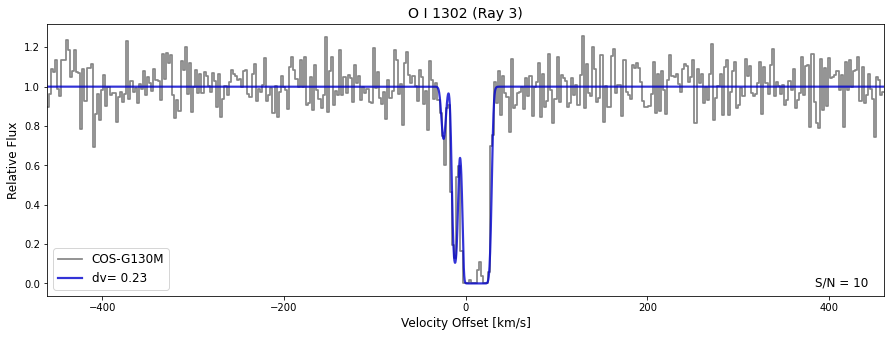

In [27]:
spec(ray3, line='O I 1302', ins='COS-G130M', num='3', col='mediumblue',
    lmin=-460.77,lmax=460.77, dlam=0.23, dlam2=2.3)

# O II 834

In [29]:
v_space(833.33, dl_COS=0.0803)

dv =  0.36000144000576
dv (COS) =  28.908115632462525
v-range = [ -720.00288001152 , 720.00288001152 ]


yt : [INFO     ] 2022-08-09 19:37:13,734 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:37:13,746 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:37:13,753 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:37:13,775 Creating spectrum
yt : [INFO     ] 2022-08-09 19:37:13,776 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 3669.72it/s]
yt : [INFO     ] 2022-08-09 19:37:13,957 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:37:13,984 Creating spectrum
yt : [INFO     ] 2022-08-09 19:37:13,985 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
yt : [INFO     ] 2022-08-09 19:37:14,014 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 11

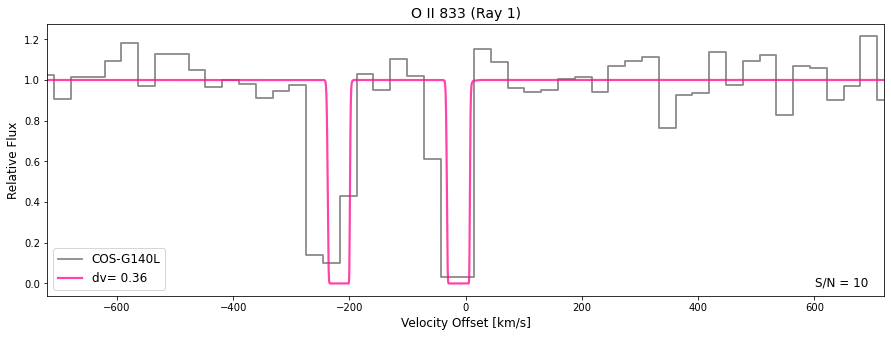

In [30]:
spec(ray1, el='O', rom_num='II', line='O II 833', ins='COS-G140L',num='1',
    lmin=-720, lmax=720, dlam=0.36, dlam2=28.9)

yt : [INFO     ] 2022-08-09 19:41:15,783 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:41:15,798 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:41:15,804 Creating spectrum
yt : [INFO     ] 2022-08-09 19:41:15,805 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 10745.05it/s]
yt : [INFO     ] 2022-08-09 19:41:15,898 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:41:15,926 Creating spectrum
yt : [INFO     ] 2022-08-09 19:41:15,927 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
yt : [INFO     ] 2022-08-09 19:41:15,962 21 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 20780.76it/s]
yt : [INFO     ] 2022-08-09 19:41:15,977 21 out of 256 line components will be deposited as unresolved 

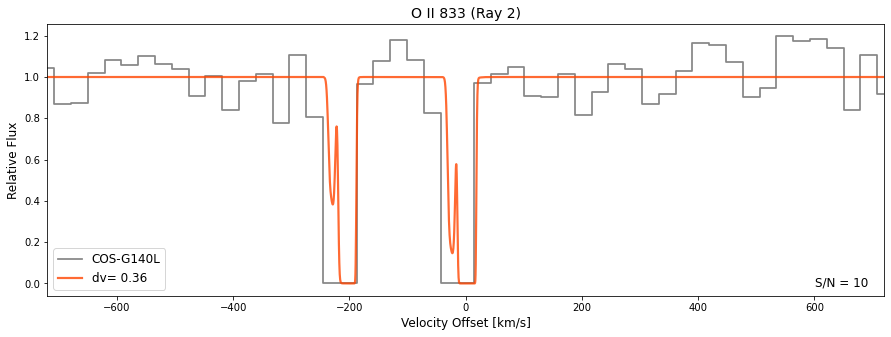

In [36]:
spec(ray2, el='O', rom_num='II', line='O II 833', ins='COS-G140L',num='2',
    lmin=-720, lmax=720, dlam=0.36, dlam2=28.9, col='orangered')

yt : [INFO     ] 2022-08-09 19:41:40,756 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:41:40,767 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:41:40,774 Creating spectrum
yt : [INFO     ] 2022-08-09 19:41:40,775 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 6012.63it/s]
yt : [INFO     ] 2022-08-09 19:41:40,909 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:41:40,936 Creating spectrum
yt : [INFO     ] 2022-08-09 19:41:40,936 Setting wavelength of velocity center to O II 833 line at z = 0.000: 833.3303 angstrom.
yt : [INFO     ] 2022-08-09 19:41:40,966 47 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 14661.19it/s]
yt : [INFO     ] 2022-08-09 19:41:40,985 47 out of 256 line components will be deposited as unresolved l

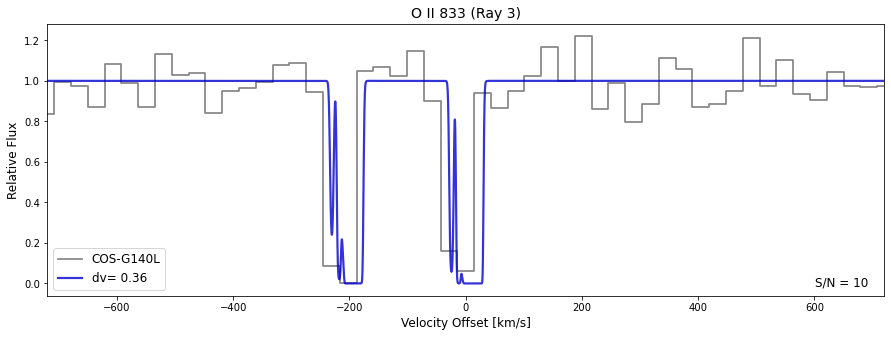

In [37]:
spec(ray3, el='O', rom_num='II', line='O II 833', ins='COS-G140L',num='3',
    lmin=-720, lmax=720, dlam=0.36, dlam2=28.9, col='mediumblue')

# Al II 1670

In [38]:
v_space(1670.7874, dl_COS=0.01223)

dv =  0.17955605841892272
dv (COS) =  2.1959705944634247
v-range = [ -359.1121168378454 , 359.1121168378454 ]


yt : [INFO     ] 2022-08-09 19:44:56,808 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:44:56,819 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:44:56,826 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:44:56,863 Creating spectrum
yt : [INFO     ] 2022-08-09 19:44:56,863 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2920.21it/s]
yt : [INFO     ] 2022-08-09 19:44:56,983 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:44:57,009 Creating spectrum
yt : [INFO     ] 2022-08-09 19:44:57,010 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 6724.63it/s]
yt : [INFO     ] 2022-08-09 19:44:57,079 Writing spectrum to ascii file: spec2.txt.
<i

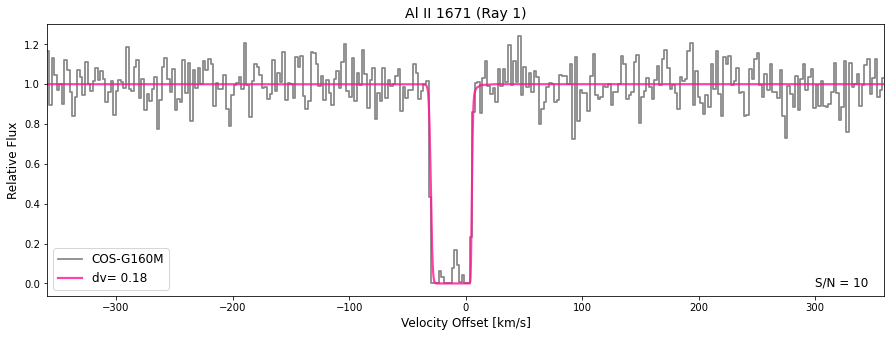

In [39]:
spec(ray1,line='Al II 1671', ins='COS-G160M',num='1',
    lmin=-359.11, lmax=359.11, dlam=0.18, dlam2=2.2)

yt : [INFO     ] 2022-08-09 19:45:33,706 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:45:33,718 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:45:33,725 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:45:33,730 Creating spectrum
yt : [INFO     ] 2022-08-09 19:45:33,731 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 10649.35it/s]
yt : [INFO     ] 2022-08-09 19:45:33,795 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:45:33,822 Creating spectrum
yt : [INFO     ] 2022-08-09 19:45:33,822 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 15497.24it/s]
yt : [INFO     ] 2022-08-09 19:45:33,875 Writing spectrum to ascii file: spec2.txt.


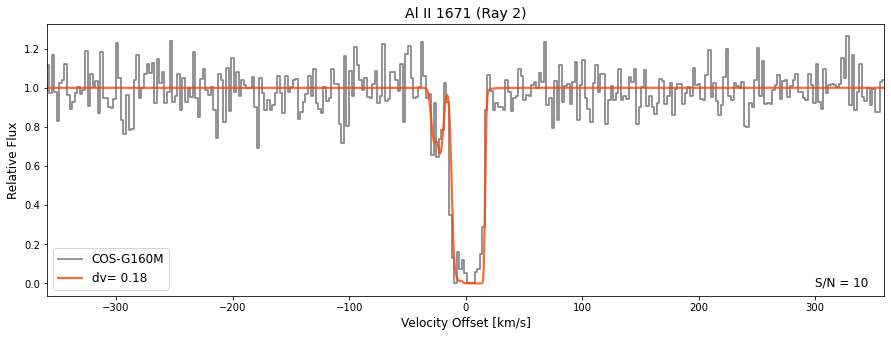

In [40]:
spec(ray2,line='Al II 1671', ins='COS-G160M',num='2',
    lmin=-359.11, lmax=359.11, dlam=0.18, dlam2=2.2, col='orangered')

yt : [INFO     ] 2022-08-09 19:51:04,021 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:51:04,033 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:51:04,041 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:51:04,046 Creating spectrum
yt : [INFO     ] 2022-08-09 19:51:04,047 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 5113.15it/s]
yt : [INFO     ] 2022-08-09 19:51:04,139 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:51:04,166 Creating spectrum
yt : [INFO     ] 2022-08-09 19:51:04,167 Setting wavelength of velocity center to Al II 1671 line at z = 0.000: 1670.7874 angstrom.
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 10251.20it/s]
yt : [INFO     ] 2022-08-09 19:51:04,225 Writing spectrum to ascii file: spec2.txt.
<

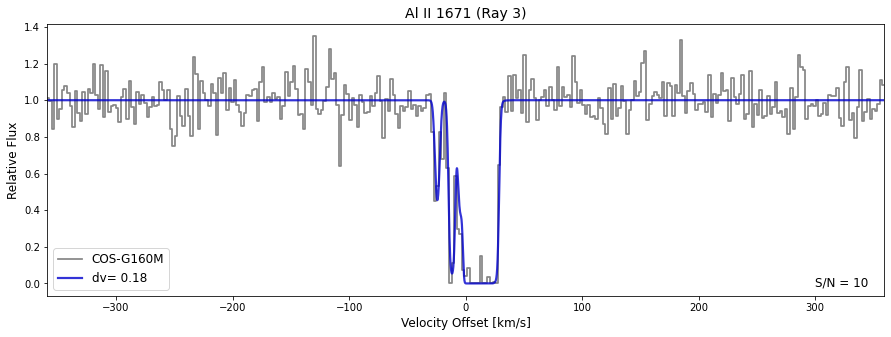

In [41]:
spec(ray3,line='Al II 1671', ins='COS-G160M',num='3',
    lmin=-359.11, lmax=359.11, dlam=0.18, dlam2=2.2, col='mediumblue')

# Al III 1854

In [42]:
v_space(1854, dl_COS=0.037)

dv =  0.16181229773462782
dv (COS) =  5.9870550161812295
v-range = [ -323.6245954692556 , 323.6245954692556 ]


yt : [INFO     ] 2022-08-09 19:53:28,705 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:53:28,717 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:53:28,725 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:53:28,762 Creating spectrum
yt : [INFO     ] 2022-08-09 19:53:28,763 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4073.31it/s]
yt : [INFO     ] 2022-08-09 19:53:28,859 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:53:28,888 Creating spectrum
yt : [INFO     ] 2022-08-09 19:53:28,888 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
yt : [INFO     ] 2022-08-09 19:53:28,923 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00

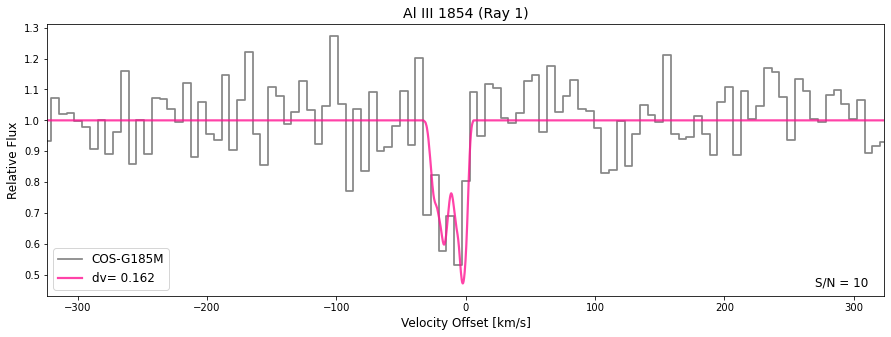

In [43]:
spec(ray1,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True,ins='COS-G185M', num='1',
    lmin=-323.6, lmax=323.6, dlam=0.162, dlam2=5.99)

yt : [INFO     ] 2022-08-09 19:54:54,045 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:54:54,058 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:54:54,065 Creating spectrum
yt : [INFO     ] 2022-08-09 19:54:54,066 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13422.11it/s]
yt : [INFO     ] 2022-08-09 19:54:54,126 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:54:54,152 Creating spectrum
yt : [INFO     ] 2022-08-09 19:54:54,153 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
yt : [INFO     ] 2022-08-09 19:54:54,186 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 18902.91it/s]
yt : [INFO     ] 2022-08-09 19:54:54,202 Writing spectrum to ascii file: spec2.txt.
<ipytho

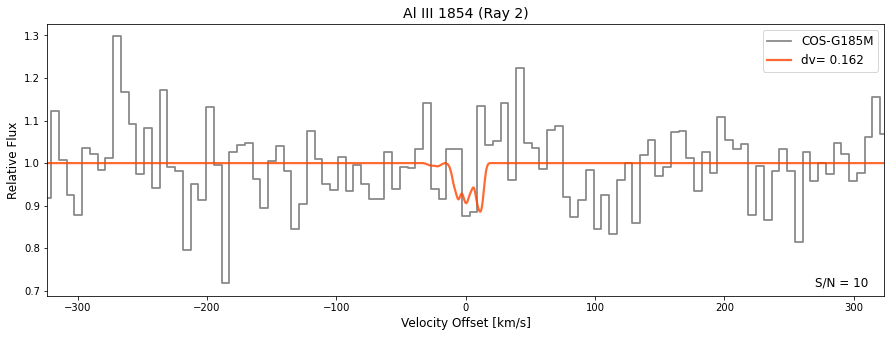

In [47]:
spec(ray2,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True,ins='COS-G185M', num='2',
    lmin=-323.6, lmax=323.6, dlam=0.162, dlam2=5.99, col='orangered')

yt : [INFO     ] 2022-08-09 19:55:18,715 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:55:18,728 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:55:18,735 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:55:18,742 Creating spectrum
yt : [INFO     ] 2022-08-09 19:55:18,743 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6632.13it/s]
yt : [INFO     ] 2022-08-09 19:55:18,824 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:55:18,850 Creating spectrum
yt : [INFO     ] 2022-08-09 19:55:18,851 Setting wavelength of velocity center to Al III 1854 line at z = 0.000: 1854.72 angstrom.
yt : [INFO     ] 2022-08-09 19:55:18,881 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00

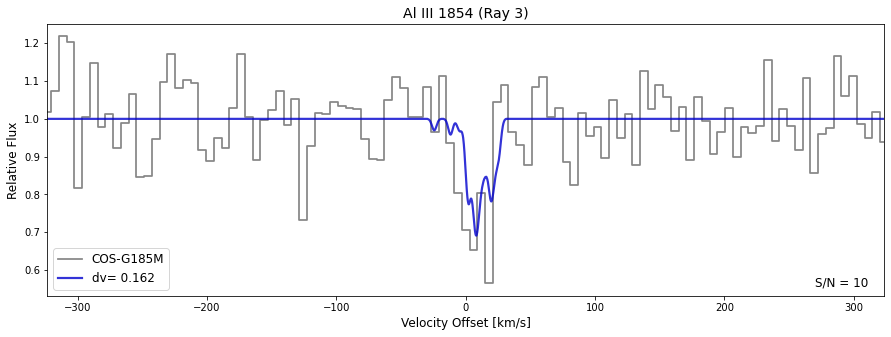

In [48]:
spec(ray3,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True,ins='COS-G185M', num='3',
    lmin=-323.6, lmax=323.6, dlam=0.162, dlam2=5.99, col='mediumblue')

# Fe II 2600

In [49]:
v_space(2600.17, dl_COS=0.04)

dv =  0.1153770714991712
dv (COS) =  4.615082859966848
v-range = [ -230.75414299834242 , 230.75414299834242 ]


yt : [INFO     ] 2022-08-09 19:59:03,650 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:59:03,662 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 19:59:03,668 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 19:59:03,730 Creating spectrum
yt : [INFO     ] 2022-08-09 19:59:03,731 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2888.44it/s]
yt : [INFO     ] 2022-08-09 19:59:03,850 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 19:59:03,876 Creating spectrum
yt : [INFO     ] 2022-08-09 19:59:03,876 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
yt : [INFO     ] 2022-08-09 19:59:03,907 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<

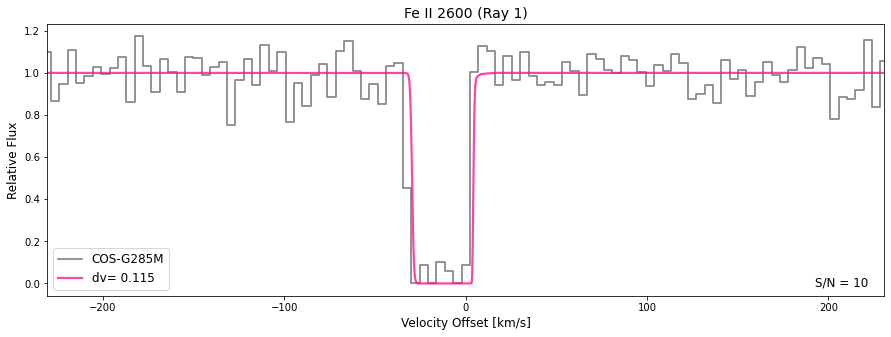

In [52]:
spec(ray1, el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', num='1',
    lmin=-230.75, lmax=230.75, dlam=0.115, dlam2=4.62)

yt : [INFO     ] 2022-08-09 20:02:28,965 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:02:28,978 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:02:28,984 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:02:28,991 Creating spectrum
yt : [INFO     ] 2022-08-09 20:02:28,992 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10425.08it/s]
yt : [INFO     ] 2022-08-09 20:02:29,057 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:02:29,084 Creating spectrum
yt : [INFO     ] 2022-08-09 20:02:29,085 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
yt : [INFO     ] 2022-08-09 20:02:29,118 15 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00

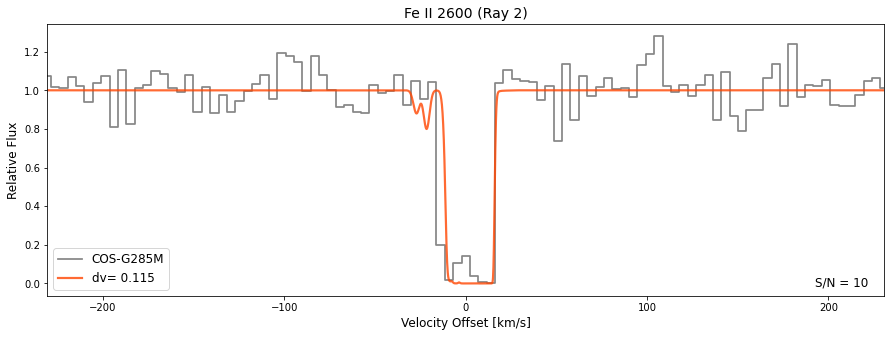

In [53]:
spec(ray2, el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', num='2',
    lmin=-230.75, lmax=230.75, dlam=0.115, dlam2=4.62, col='orangered')

yt : [INFO     ] 2022-08-09 20:04:12,839 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:04:12,851 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:04:12,857 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:04:12,862 Creating spectrum
yt : [INFO     ] 2022-08-09 20:04:12,863 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5098.59it/s]
yt : [INFO     ] 2022-08-09 20:04:12,949 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:04:12,976 Creating spectrum
yt : [INFO     ] 2022-08-09 20:04:12,976 Setting wavelength of velocity center to Fe II 2600 line at z = 0.000: 2600.17 angstrom.
yt : [INFO     ] 2022-08-09 20:04:13,006 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<

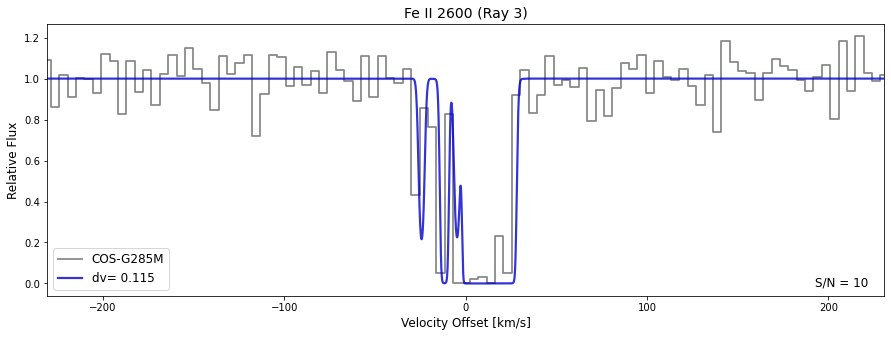

In [54]:
spec(ray3, el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', num='3',
    lmin=-230.75, lmax=230.75, dlam=0.115, dlam2=4.62, col='mediumblue')

# Fe III 1122

In [55]:
v_space(1122.5241)

dv =  0.2672548411210058
dv (COS) =  2.6645307659764272
v-range = [ -534.5096822420115 , 534.5096822420115 ]


yt : [INFO     ] 2022-08-09 20:08:23,277 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:08:23,287 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:08:23,294 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:08:23,346 Creating spectrum
yt : [INFO     ] 2022-08-09 20:08:23,347 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4212.97it/s]
yt : [INFO     ] 2022-08-09 20:08:23,439 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:08:23,465 Creating spectrum
yt : [INFO     ] 2022-08-09 20:08:23,466 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
yt : [INFO     ] 2022-08-09 20:08:23,496 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256

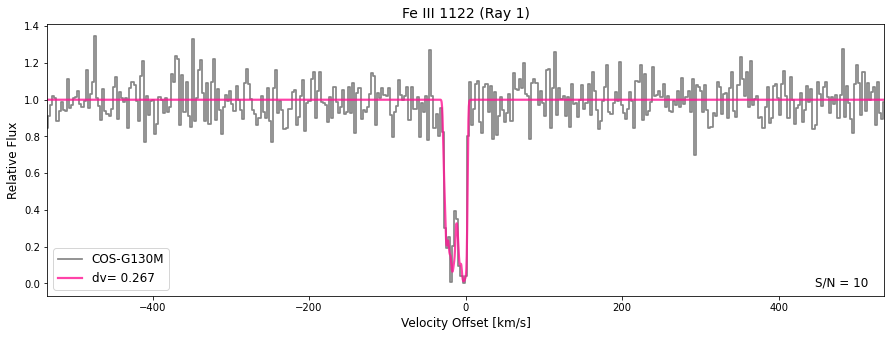

In [57]:
spec(ray1, el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', num='1',
    lmin=-534.5, lmax=534.5, dlam=0.267, dlam2=2.66)

yt : [INFO     ] 2022-08-09 20:08:52,989 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:08:53,001 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:08:53,009 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:08:53,014 Creating spectrum
yt : [INFO     ] 2022-08-09 20:08:53,015 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11541.89it/s]
yt : [INFO     ] 2022-08-09 20:08:53,080 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:08:53,106 Creating spectrum
yt : [INFO     ] 2022-08-09 20:08:53,106 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
yt : [INFO     ] 2022-08-09 20:08:53,138 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/25

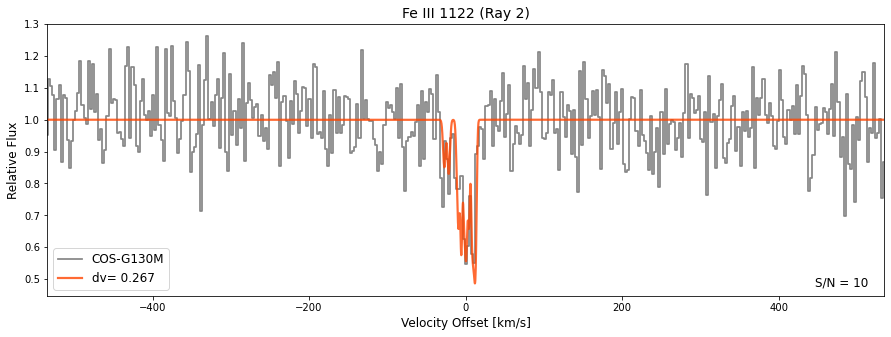

In [58]:
spec(ray2, el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', num='2',
    lmin=-534.5, lmax=534.5, dlam=0.267, dlam2=2.66, col='orangered')

yt : [INFO     ] 2022-08-09 20:09:28,079 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:09:28,093 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:09:28,100 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:09:28,104 Creating spectrum
yt : [INFO     ] 2022-08-09 20:09:28,105 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 6645.22it/s]
yt : [INFO     ] 2022-08-09 20:09:28,182 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:09:28,210 Creating spectrum
yt : [INFO     ] 2022-08-09 20:09:28,210 Setting wavelength of velocity center to Fe III 1122 line at z = 0.000: 1122.5241 angstrom.
yt : [INFO     ] 2022-08-09 20:09:28,245 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256

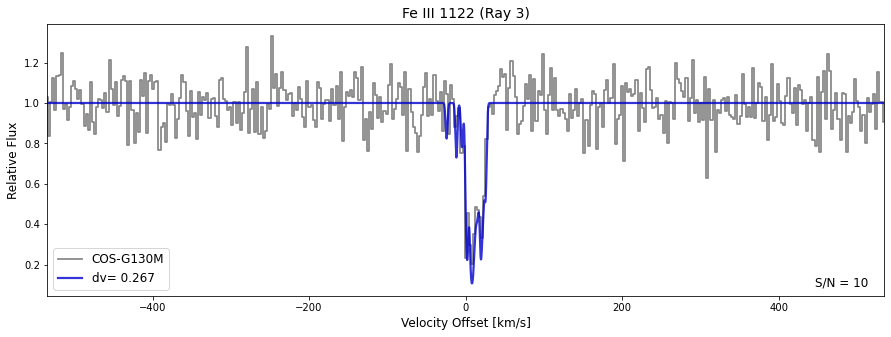

In [59]:
spec(ray3, el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', num='3',
    lmin=-534.5, lmax=534.5, dlam=0.267, dlam2=2.66, col='mediumblue')

# Mg II 2796

In [60]:
v_space(2796.35, dl_COS=0.04)

dv =  0.10728270781554526
dv (COS) =  4.291308312621811
v-range = [ -214.56541563109053 , 214.56541563109053 ]


yt : [INFO     ] 2022-08-09 20:12:22,530 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:12:22,542 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:12:22,548 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:12:22,580 Creating spectrum
yt : [INFO     ] 2022-08-09 20:12:22,581 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2088.06it/s]
yt : [INFO     ] 2022-08-09 20:12:22,736 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:12:22,762 Creating spectrum
yt : [INFO     ] 2022-08-09 20:12:22,763 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
yt : [INFO     ] 2022-08-09 20:12:22,793 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<

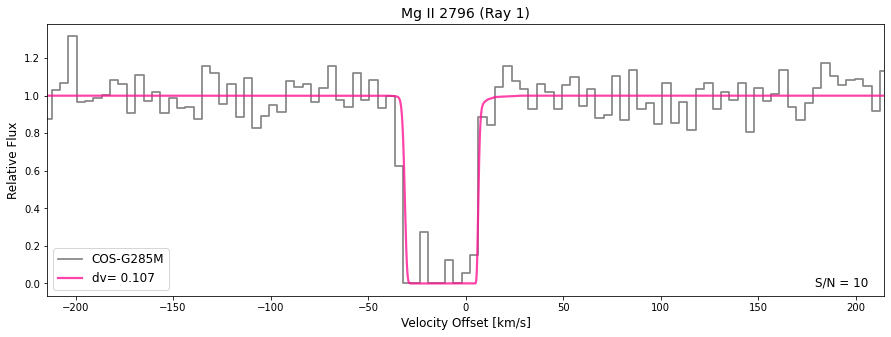

In [61]:
spec(ray1,el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', num='1',
    lmin=-214.57, lmax=214.57, dlam=0.107, dlam2=4.29)

yt : [INFO     ] 2022-08-09 20:14:08,089 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:14:08,102 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:14:08,110 Creating spectrum
yt : [INFO     ] 2022-08-09 20:14:08,111 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7799.16it/s]
yt : [INFO     ] 2022-08-09 20:14:08,186 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:14:08,213 Creating spectrum
yt : [INFO     ] 2022-08-09 20:14:08,213 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
yt : [INFO     ] 2022-08-09 20:14:08,248 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15072.81it/s]
yt : [INFO     ] 2022-08-09 20:14:08,267 Writing spectrum to ascii file: spec2.txt.
<ipython-inp

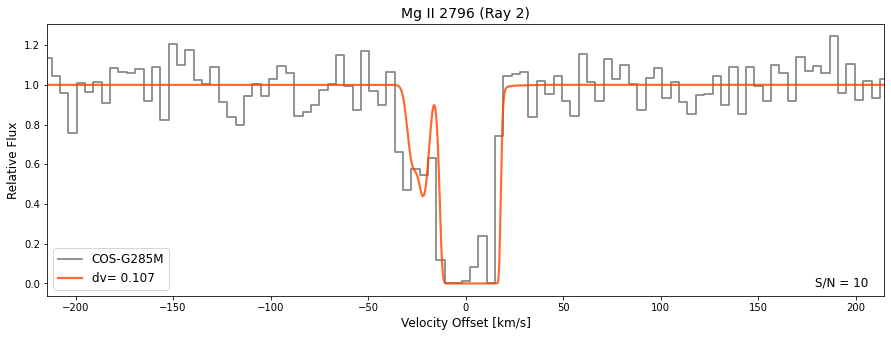

In [63]:
spec(ray2,el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', num='2',
    lmin=-214.57, lmax=214.57, dlam=0.107, dlam2=4.29, col='orangered')

yt : [INFO     ] 2022-08-09 20:14:27,458 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:14:27,472 Setting instrument to Custom
yt : [INFO     ] 2022-08-09 20:14:27,479 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-09 20:14:27,484 Creating spectrum
yt : [INFO     ] 2022-08-09 20:14:27,485 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3780.33it/s]
yt : [INFO     ] 2022-08-09 20:14:27,593 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-09 20:14:27,621 Creating spectrum
yt : [INFO     ] 2022-08-09 20:14:27,622 Setting wavelength of velocity center to Mg II 2796 line at z = 0.000: 2796.35 angstrom.
yt : [INFO     ] 2022-08-09 20:14:27,652 41 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<

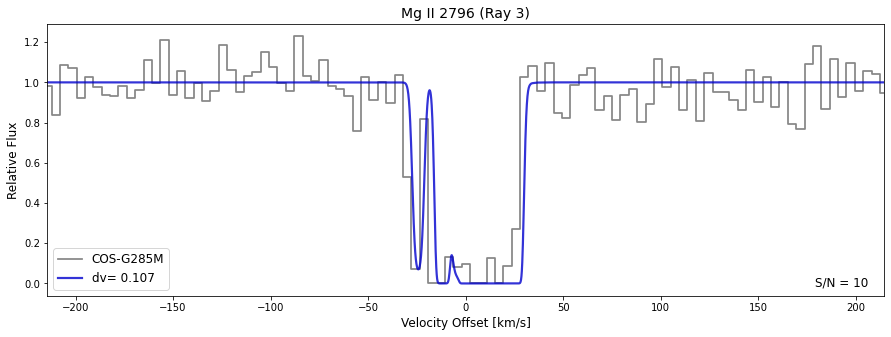

In [64]:
spec(ray3,el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', num='3',
    lmin=-214.57, lmax=214.57, dlam=0.107, dlam2=4.29, col='mediumblue')